### Run this to resolve import errors

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

{'n_neighbors': 6} Accuracy: 0.8474308300395256
New sample prediction:  [2]


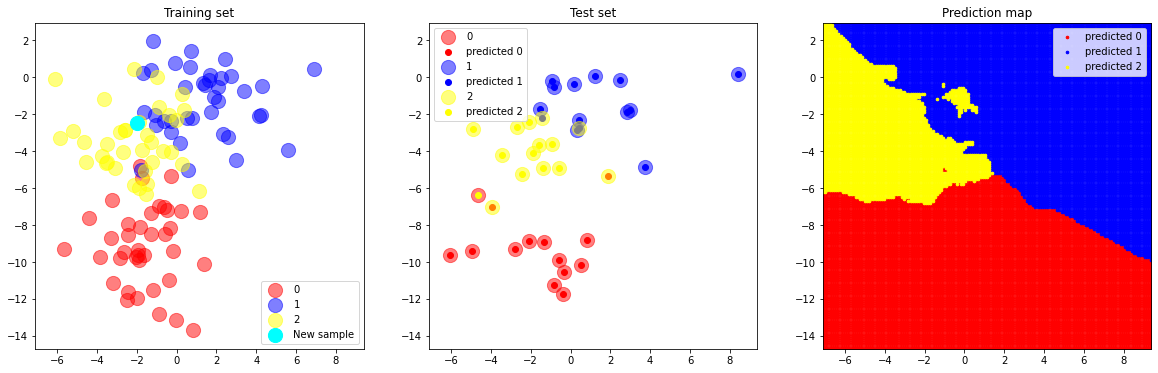

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_blobs

# This is the stuff that matters --------

# Generate 2d toy dataset
X, y = make_blobs(n_samples=150, centers=3, n_features=2, cluster_std=1.8, random_state=2)
test_sample = [-2, -2.5]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# - Create machine learning model
# Define parameters to test (trying nearest neighbors from 1 to 30)
param_grid = {'n_neighbors': [i for i in range(1, 31)]}

# Use Grid Search to test the specified parameters on the test set
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Apply result with best parameters to the dataset
grid_search.fit(X_train, y_train)

# Predict on test set
y_predict = grid_search.predict(X_test)

# Print parameters used and best score
print(grid_search.best_params_, f"Accuracy: {grid_search.best_score_}")
print("New sample prediction: ", grid_search.predict([test_sample]))


# -------------------------------------------
# Plotting crap who cares -------------------

# Finding min and max values for plot axes
x_min = X[:, 0].min() - 1
x_max = X[:, 0].max() + 1
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1

# Add test sample to first plot
X_plot = np.append(X_train, [test_sample], axis=0)
y_plot = np.append(y_train, 3)

# Create 3 plots
_, ax = plt.subplots(1, 3, figsize=(20, 6))

# Plot training set points
ax[0].set_title("Training set")
ax[0].scatter(X_plot[:,0][y_plot==0], X_plot[:,1][y_plot==0], s=200, alpha=0.5, label='0', c='red')
ax[0].scatter(X_plot[:,0][y_plot==1], X_plot[:,1][y_plot==1], s=200, alpha=0.5, label='1', c='blue')
ax[0].scatter(X_plot[:,0][y_plot==2], X_plot[:,1][y_plot==2], s=200, alpha=0.5, label='2', c='yellow')
ax[0].scatter(X_plot[:,0][y_plot==3], X_plot[:,1][y_plot==3], s=200, label='New sample', c='cyan')
ax[0].legend(loc='best')
ax[0].set_ylim(y_min, y_max)
ax[0].set_xlim(x_min, x_max)

# Plot test set points
ax[1].set_title("Test set")
ax[1].scatter(X_test[:,0][y_test==0], X_test[:,1][y_test==0], s=200, alpha=0.5, label='0', c='red')
ax[1].scatter(X_test[:,0][y_predict==0], X_test[:,1][y_predict==0], label='predicted 0', c='red')
ax[1].scatter(X_test[:,0][y_test==1], X_test[:,1][y_test==1], s=200, alpha=0.5, label='1', c='blue')
ax[1].scatter(X_test[:,0][y_predict==1], X_test[:,1][y_predict==1], label='predicted 1', c='blue')
ax[1].scatter(X_test[:,0][y_test==2], X_test[:,1][y_test==2], s=200, alpha=0.5, label='2', c='yellow')
ax[1].scatter(X_test[:,0][y_predict==2], X_test[:,1][y_predict==2], label='predicted 2', c='yellow')
ax[1].legend(loc='best')
ax[1].set_ylim(y_min, y_max)
ax[1].set_xlim(x_min, x_max)

# Plotting prediction map --

# Making a fake dataset that covers the whole plot
wow = np.empty((1, 2))
point_size = 150
x_step = (x_max - x_min) / point_size
y_step = (y_max - y_min) / point_size
for i in np.arange(x_min, x_max + x_step, x_step):
    for j in np.arange(y_min, y_max + y_step, y_step):
        wow = np.append(wow, [[i, j]], axis=0)

# Predictions on that dataset
y_predict = grid_search.predict(wow)

# Plot predictions
ax[2].set_title("Prediction map")
ax[2].scatter(wow[:,0][y_predict==0], wow[:,1][y_predict==0], label='predicted 0', c='red', s=1000/point_size)
ax[2].scatter(wow[:,0][y_predict==1], wow[:,1][y_predict==1], label='predicted 1', c='blue', s=1000/point_size)
ax[2].scatter(wow[:,0][y_predict==2], wow[:,1][y_predict==2], label='predicted 2', c='yellow', s=1000/point_size)
ax[2].legend(loc='best')
ax[2].set_ylim(y_min, y_max)
ax[2].set_xlim(x_min, x_max); # Semicolon stops this line from showing up in output


## Extracting data from logfiles

In [3]:
from log_parser import parse_keyboard_log
from keyboard_heatmap import KeyboardHeatmap

# Segment length of each data sample
seg_length = 60

# List of parsed logfiles
keyboard = []
keyboard.append(parse_keyboard_log("keylogs/joseph/keyboard.log"))
keyboard.append(parse_keyboard_log("keylogs/jonathan/keyboard.log"))
keyboard.append(parse_keyboard_log("keylogs/zirui/keyboard.log"))

# Hack to get the number of segments contained in each file
lengths = [
    keyboard[0].time.iloc[-1] / seg_length,
    keyboard[1].time.iloc[-1] / seg_length,
    keyboard[2].time.iloc[-1] / seg_length
]

# Empty lists for inserting data
X_actual = []
y_actual = []


for k in range(len(keyboard)):
    for i in range(int(lengths[k])):
        # For each segment in each logfile
        # Create a heatmap for that segment
        heatmap = KeyboardHeatmap(keyboard[k], i, seg_length)
        # If the heatmap isn't blank
        if heatmap.class_label() != 'Null':
            X_actual.append(heatmap.heatmap_data().ravel().tolist())
            y_actual.append(heatmap.class_label())

# Display features
"""
for i in range(len(X_actual)):
    print(X_actual[i][:10], y_actual[i])
"""
print(f"Data samples: {len(y_actual)}")

FileNotFoundError: [Errno 2] No such file or directory: '../keylogs/joseph/keyboard.log'

## Training a KNN model on keyboard heatmap data

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_actual, y_actual, random_state=0)

# - Create machine learning model
# Define parameters to test (trying nearest neighbors from 1 to 15)
param_grid = {'n_neighbors': [i for i in range(1, 16)]}

# Use Grid Search to test the specified parameters on the test set
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Apply result with best parameters to the dataset
grid_search.fit(X_train, y_train)

# Print parameters used and best score
print(grid_search.best_params_, 
    f"Train score: {grid_search.score(X_train, y_train)} " +
    f"Test score: {grid_search.score(X_test, y_test)}"
)


# Predict on test set
y_predict = grid_search.predict(X_test)

# Ouput predictions vs ground truth values
for i in range(len(y_predict)):
    print(f"Actual: {y_test[i]:<10}  -  Predicted: {y_predict[i]}")



{'n_neighbors': 2} Train score: 0.8611111111111112 Test score: 0.6666666666666666
Actual: nan         -  Predicted: Joseph
Actual: Joseph      -  Predicted: Joseph
Actual: nan         -  Predicted: Joseph
Actual: nan         -  Predicted: nan
Actual: nan         -  Predicted: nan
Actual: nan         -  Predicted: nan
Actual: nan         -  Predicted: nan
Actual: nan         -  Predicted: Joseph
Actual: Joseph      -  Predicted: nan
Actual: Joseph      -  Predicted: Joseph
Actual: Joseph      -  Predicted: Joseph
Actual: nan         -  Predicted: nan
